# Global Imports

In [2]:
import numpy as np
from qiskit.circuit.library import TwoLocal
import networkx as nx

# Local Imports

In [3]:
from hamiltonians import gen_maxcut_op, get_exact_ground, gen_maxcut_op_from_graph
from mub_state_gen import generate_all_subsets
from landscape import calculate_energy_landscape, find_k_best_results
from graphing import display_energy_landscape, display_energy_histogram
from vqe import Parameters, get_standard_params, run_vqe_experiment

# Example Experiment

In [4]:
n_qubits = 4
n_mub_qubits = 3
edges = [(0, 1), (0, 2), (0, 3), (1, 2), (2, 3)]
op = gen_maxcut_op(n_qubits, edges)
ansatz = TwoLocal(n_qubits, 'ry', 'cx', 'linear', reps=2, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)
print(zeroset_anastz)
print(f"attempting all MUB states over the operator {op}")
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print(exact_result)



     ┌───────┐ ░                 ░ ┌───────┐ ░                 ░ ┌───────┐
q_0: ┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├─░───■─────────────░─┤ Ry(0) ├
     ├───────┤ ░ ┌─┴─┐           ░ ├───────┤ ░ ┌─┴─┐           ░ ├───────┤
q_1: ┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├─░─┤ X ├──■────────░─┤ Ry(0) ├
     ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤ ░ └───┘┌─┴─┐      ░ ├───────┤
q_2: ┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├─░──────┤ X ├──■───░─┤ Ry(0) ├
     ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤ ░      └───┘┌─┴─┐ ░ ├───────┤
q_3: ┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├─░───────────┤ X ├─░─┤ Ry(0) ├
     └───────┘ ░           └───┘ ░ └───────┘ ░           └───┘ ░ └───────┘
attempting all MUB states over the operator SparsePauliOp(['IIZZ', 'IZIZ', 'ZIIZ', 'IZZI', 'ZZII', 'IIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -2.5+0.j])
-4.0


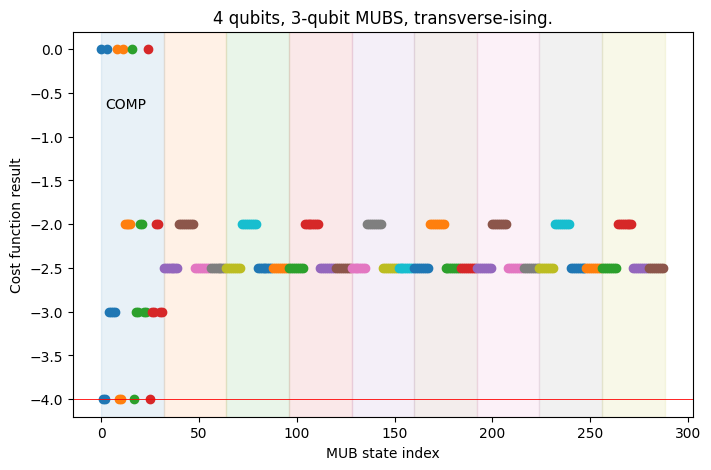

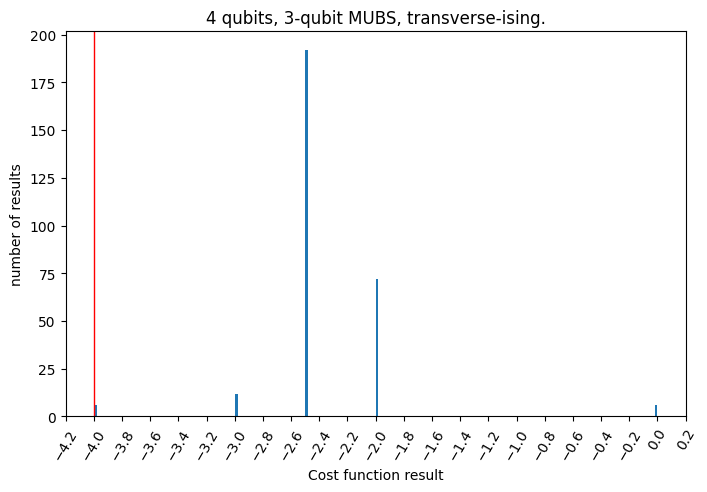

In [5]:
display_energy_landscape(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.")
display_energy_histogram(results, exact_result, graph_title=f"{n_qubits} qubits, {n_mub_qubits}-qubit MUBS, transverse-ising.", bins=200)

## Combined Example with VQE

Energy Landscape:


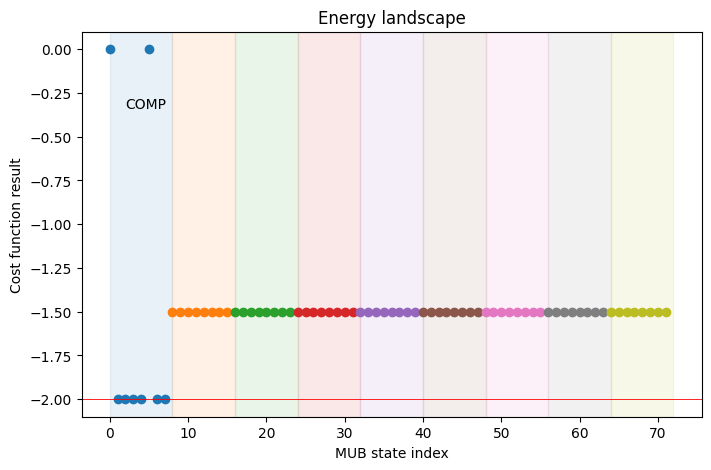

Energy Histogram:


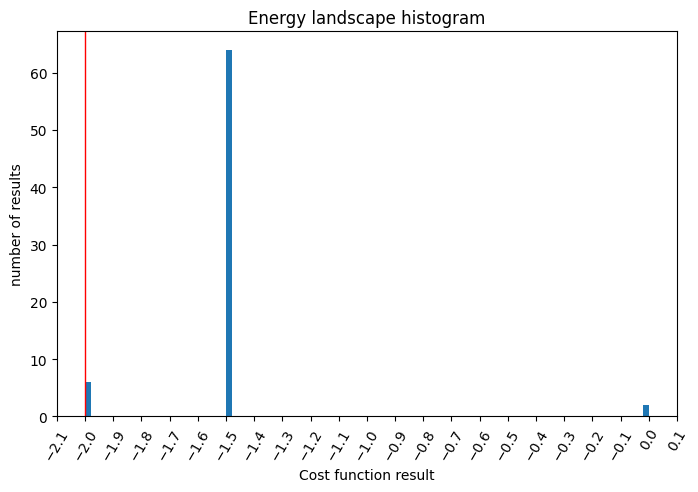

The operator SparsePauliOp(['IZZ', 'ZIZ', 'ZZI', 'III'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j, -1.5+0.j]) has the exact value -2.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -2.0
WOLOLO!
(1, -2.0, True)
running from point with value -1.5
WOLOLO!
(81, -1.9906013697093279, True)
running from point with value -1.5
WOLOLO!
(52, -1.9949943222505313, True)
running from point with value -1.5
WOLOLO!
(55, -1.9909786784219272, True)
running from point with value -1.5
100: -1.983472566923588
WOLOLO!
(106, -1.9933455227976526, True)


In [6]:
# generate operator
n_qubits = 3
n_mub_qubits = 3
edges =[(0,1), (1,2), (2,0)]
op = gen_maxcut_op(n_qubits, edges)
exact_result = get_exact_ground(op)

ansatz = TwoLocal(3, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

# calculate landscape and graphs
results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
exact_result = get_exact_ground(op)
print("Energy Landscape:")
display_energy_landscape(results, exact_result=exact_result)
print("Energy Histogram:")
display_energy_histogram(results, exact_result=exact_result)

# run VQE from the best 5 examples
params = get_standard_params(n_qubits)
params.success_bound = 1e-2
params.exact_result = exact_result
params.optimizer = 'COBYLA'
params.report_period=100
params.report_thetas=False

print(f"The operator {op} has the exact value {params.exact_result}.")
print(f"Now trying to reach the vcalue from different MUB points.")
for initial_state, value in find_k_best_results(results, 10):
    print(f"running from point with value {value}")
    try:
        print(run_vqe_experiment(op, ansatz, initial_state, params))
    except:
        print("AAAAAAAAAAAAAAAA")
    

### 5-8 qubit experiments

Energy Landscape:


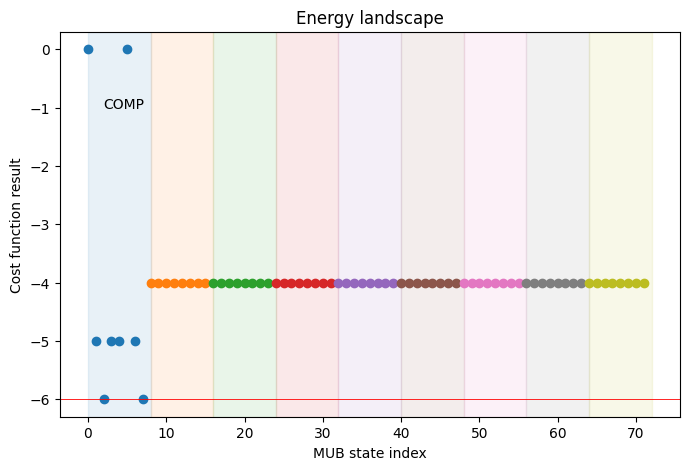

Energy Histogram:


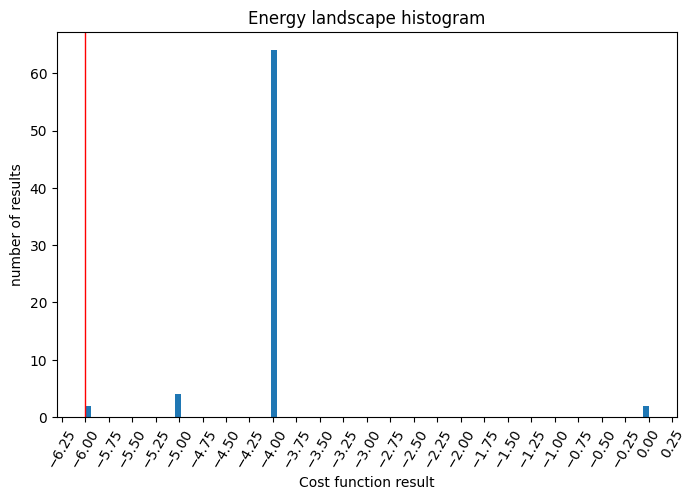

The operator SparsePauliOp(['IIIZZ', 'IIZIZ', 'IZIIZ', 'ZIIIZ', 'IIZZI', 'IZIZI', 'ZIIZI', 'IZZII', 'ZIZII', 'IIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j, -4.5+0.j]) has the exact value -6.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -6.0
WOLOLO!
(1, -6.0, True)
running from point with value -5.0
100: -5.450348089531632
200: -5.926450678537551
300: -5.950428969769392
WOLOLO!
(388, -5.990775915192117, True)
running from point with value -5.0
100: -5.8119247751757355
200: -5.933199066384522
300: -5.978556852791002
400: -5.989300951882362
WOLOLO!
(454, -5.990372051551791, True)
running from point with value -5.0
100: -5.465025730639061
200: -5.883243956191912
300: -5.901595805513779
400: -5.985754012151651
WOLOLO!
(420, -5.9901702424055205, True)
Energy Landscape:


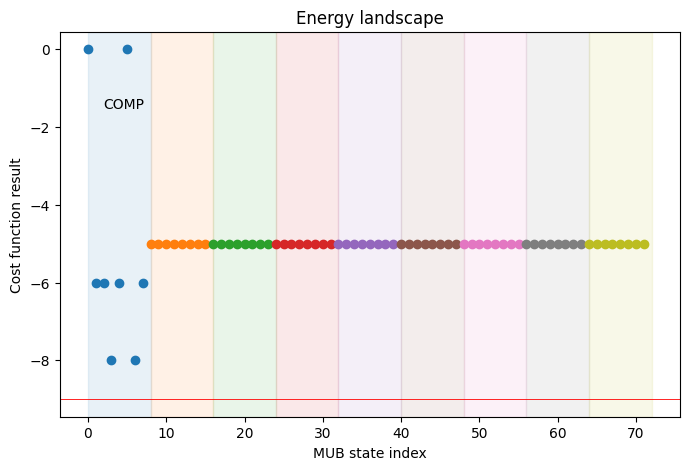

Energy Histogram:


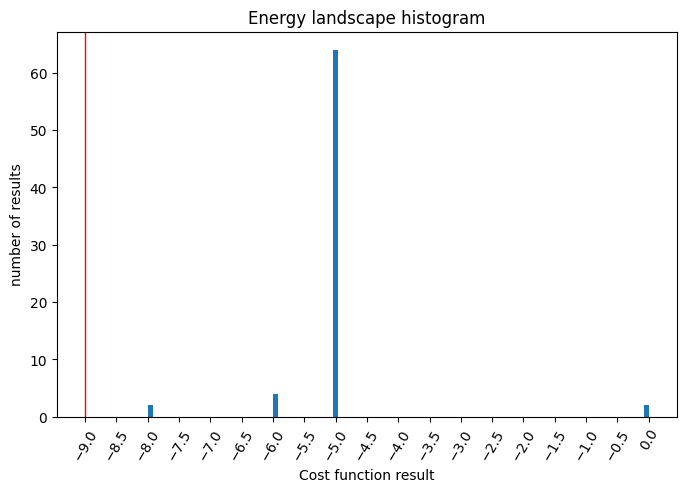

The operator SparsePauliOp(['IIIIZZ', 'IIIZIZ', 'IIZIIZ', 'IZIIIZ', 'ZIIIIZ', 'IIIZZI', 'IZIIZI', 'ZIIIZI', 'IIZZII', 'ZIIZII', 'IZZIII', 'ZIZIII', 'IIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -9.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -7.89107963390258
200: -7.999999999999998
300: -7.999999999999999
400: -7.9999998915790895
500: -7.999999998490684
600: -7.999999999966253
700: -7.999999999999751
(797, -7.999999999998815, False)
running from point with value -8.0
100: -7.890639596584963
200: -7.999999999999998
300: -7.999999999999999
400: -7.999999914969976
500: -7.999999998561936
600: -7.999999999964844
700: -7.999999999999515
(797, -7.999999999998711, False)
running from point with value -6.0
100: -7.027311752593959
200: -8.128470973664268
300: -8.516863389202339
400: -8.791416324480892


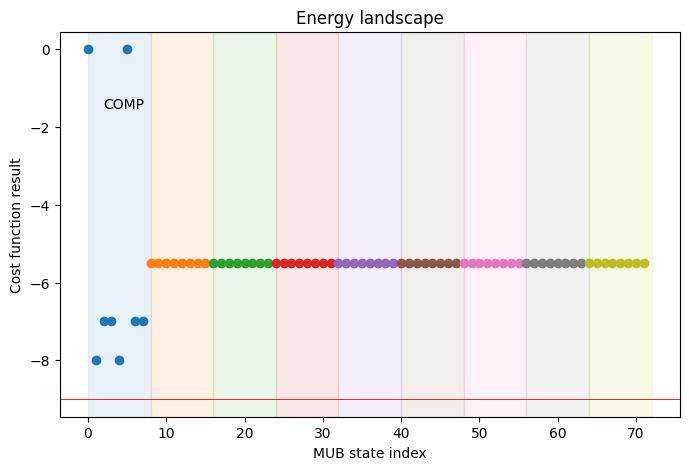

Energy Histogram:


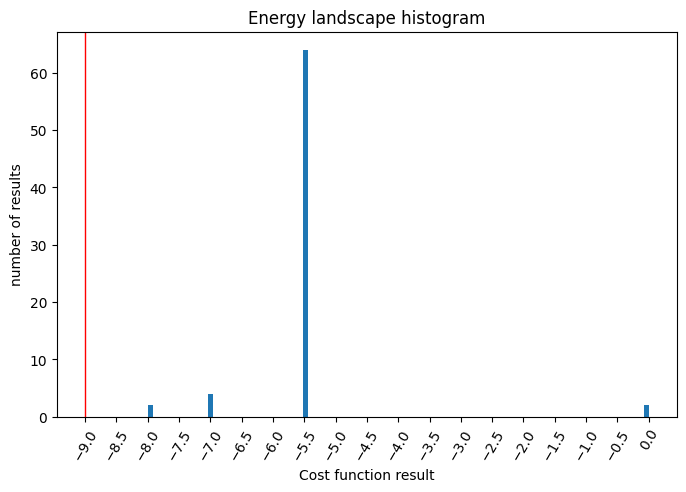

The operator SparsePauliOp(['IIIIIZZ', 'IIIZIIZ', 'IIZIIIZ', 'IIIZIZI', 'IIZIIZI', 'IIZIZII', 'IZIIZII', 'IIZZIII', 'IZIZIII', 'ZIIZIII', 'ZIZIIII', 'ZZIIIII', 'IIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j, -6. +0.j]) has the exact value -9.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -8.0
100: -8.061487650342645
200: -8.423921896706126
300: -8.532976274083037
400: -8.522049343196088
500: -8.566043285601857
600: -8.58703746283635
700: -8.6693563759883
800: -8.822732748708997
900: -8.922624344931364
1000: -8.957009306419646
1100: -8.970498557988915
1200: -8.97529142683418
WOLOLO!
(1263, -8.990173624068603, True)
running from point with value -8.0
100: -8.064577089228692
200: -8.304854924582767
300: -8.584867827574406
400: -8.626205547026284
500: -8.711550421330855
600: -8.867547937295274
700: -8.942241030784324
800: -8.96054770419255
9

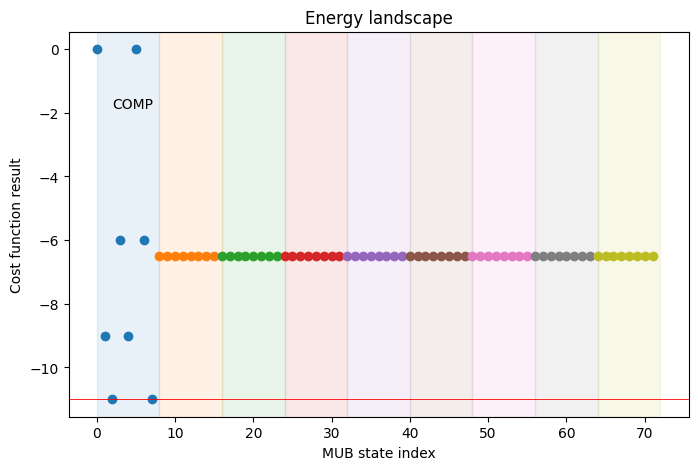

Energy Histogram:


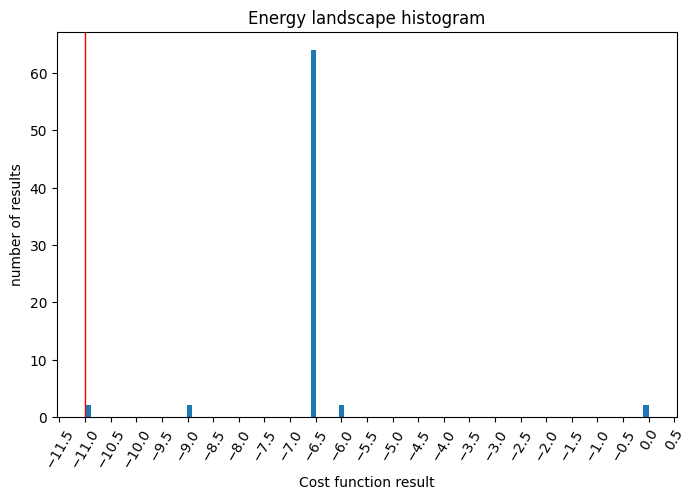

The operator SparsePauliOp(['IIIIIIZZ', 'IIIIIZIZ', 'IIIIZIIZ', 'IIZIIIIZ', 'IZIIIIIZ', 'IIIIZIZI', 'ZIIIIIZI', 'IIIZIZII', 'IIIZZIII', 'IIZIZIII', 'IZIIZIII', 'ZIIIZIII', 'IZIZIIII', 'ZZIIIIII', 'IIIIIIII'],
              coeffs=[ 0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,  0.5+0.j,
 -7. +0.j]) has the exact value -11.0.
Now trying to reach the vcalue from different MUB points.
running from point with value -11.0
WOLOLO!
(1, -11.0, True)
running from point with value -11.0
WOLOLO!
(1, -11.0, True)
running from point with value -9.0
100: -9.028618715972808
200: -9.148367925500136
300: -10.056926063935183
400: -9.73968568426906
500: -10.450696585197374
600: -10.466502826717718
700: -10.589403679528978
800: -10.752455066953868
900: -10.856769975166449
1000: -10.930641392311585
1100: -10.960683188046275
1200: -10.982106998069831
1300: -10.989526573408595
WOLOLO!
(1309, -10.990871177343376, True)
running

In [7]:
rand_graph_5 = nx.gnm_random_graph(5, 9)
rand_graph_6 = nx.gnm_random_graph(6, 12)
rand_graph_7 = nx.gnm_random_graph(7, 12)
rand_graph_8 = nx.gnm_random_graph(8, 14)
graphs = [rand_graph_5, rand_graph_6, rand_graph_7, rand_graph_8]

for graph in graphs:
    op = gen_maxcut_op_from_graph(graph)
    exact_result = get_exact_ground(op)

    ansatz = TwoLocal(op.num_qubits, ['rx', 'ry', 'rz'], 'cx', 'linear', reps=3, insert_barriers=True).decompose()
    zeroset_anastz = ansatz.assign_parameters([0.0]*ansatz.num_parameters)

    # calculate landscape and graphs
    results = calculate_energy_landscape(op, n_mub_qubits, generate_all_subsets(n_mub_qubits, n_qubits), appended_ansatz=zeroset_anastz)
    exact_result = get_exact_ground(op)
    print("Energy Landscape:")
    display_energy_landscape(results, exact_result=exact_result)
    print("Energy Histogram:")
    display_energy_histogram(results, exact_result=exact_result)

    # run VQE from the best 5 examples
    params = get_standard_params(n_qubits)
    params.success_bound = 1e-2
    params.exact_result = exact_result
    params.optimizer = 'COBYLA'
    params.report_period=100
    params.report_thetas=False
    params.max_iter = 3000

    print(f"The operator {op} has the exact value {params.exact_result}.")
    print(f"Now trying to reach the vcalue from different MUB points.")
    for initial_state, value in find_k_best_results(results, 5):
        print(f"running from point with value {value}")
        print(run_vqe_experiment(op, ansatz, initial_state, params))
    

## Conclusions from the current set of experiments

1. In maxcut, going from a non-ideal state to an ideal state takes a considerable amount of steps.
2. Not necessarily because of a barren plateau - could just be that the optimizer step size was small.
3. To gain clearer insights, we need longer experiments and a clearer indication of progress other than "couldn't reach the goal".